# **Project**: Bank Customer Segmentation

### **Goal**: train unsupervised machine learning algorithms to perform customer market segmentation. I will use K-means method to divide a group of bank customer in to four groups: 

 * Transactors: the customers who pay least amount of intrerest charges and careful with their money
 * revolvers: the customers who use credit card as a loan. This group is most lucrative sector for the bank since they pay 20% interest. 
 * VIP/Prime: the customers with high credit limit/% of full payment; targeted to increase their credit limit/spending. 
 * New customers: the customers with low tenure and low balance who can be targeted to enroll in other bank services(ex: travel credit card)
 
### **Key word**: Artificial Intelligence, Machine Learning, Clustering, Python Programming, unsupervised machine learning, K-means ,Principal Component Analysis 

### **Tools**: pandas, numpy, seaborn, matplotlib, sklearn

### **Data Source**: https://www.kaggle.com/arjunbhasin2013/ccdata

## Set Up

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Data Wrangling

###Following is the Data Dictionary for Credit Card dataset :

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

In [4]:
path ='/content/drive/MyDrive/ML project/Unsupervised Machine Learning for Customer Segmentation/marketing_data.csv'
df = pd.read_csv(path)

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
df.shape

(8950, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
#description
describe_df = df.describe()
describe_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
#The customer who made the maximum "ONEOFF_PURCHASES"
df[df.ONEOFF_PURCHASES == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
#The customer who made the maximum cash advance transaction 
df[df.CASH_ADVANCE == df.CASH_ADVANCE.values.max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Exploratory Data Analysis

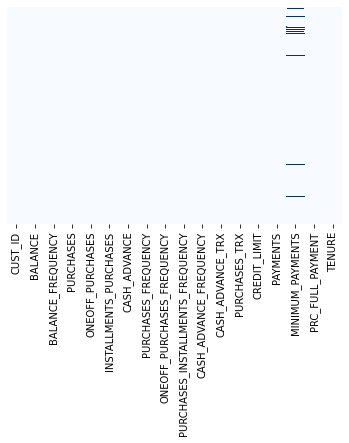

In [9]:
#Check the missing data
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [10]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

CREDIT_LIMIT  has 1 and MINIMUM_PAYMENTS has 313 missing data. We can replace the missing data with the average of the corresponding column. 

In [12]:
# replace the missing data with the average
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
# Drop the Customer ID Coulmn
df.drop('CUST_ID', axis = 1, inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.shape # we now have 17 columns

(8950, 17)

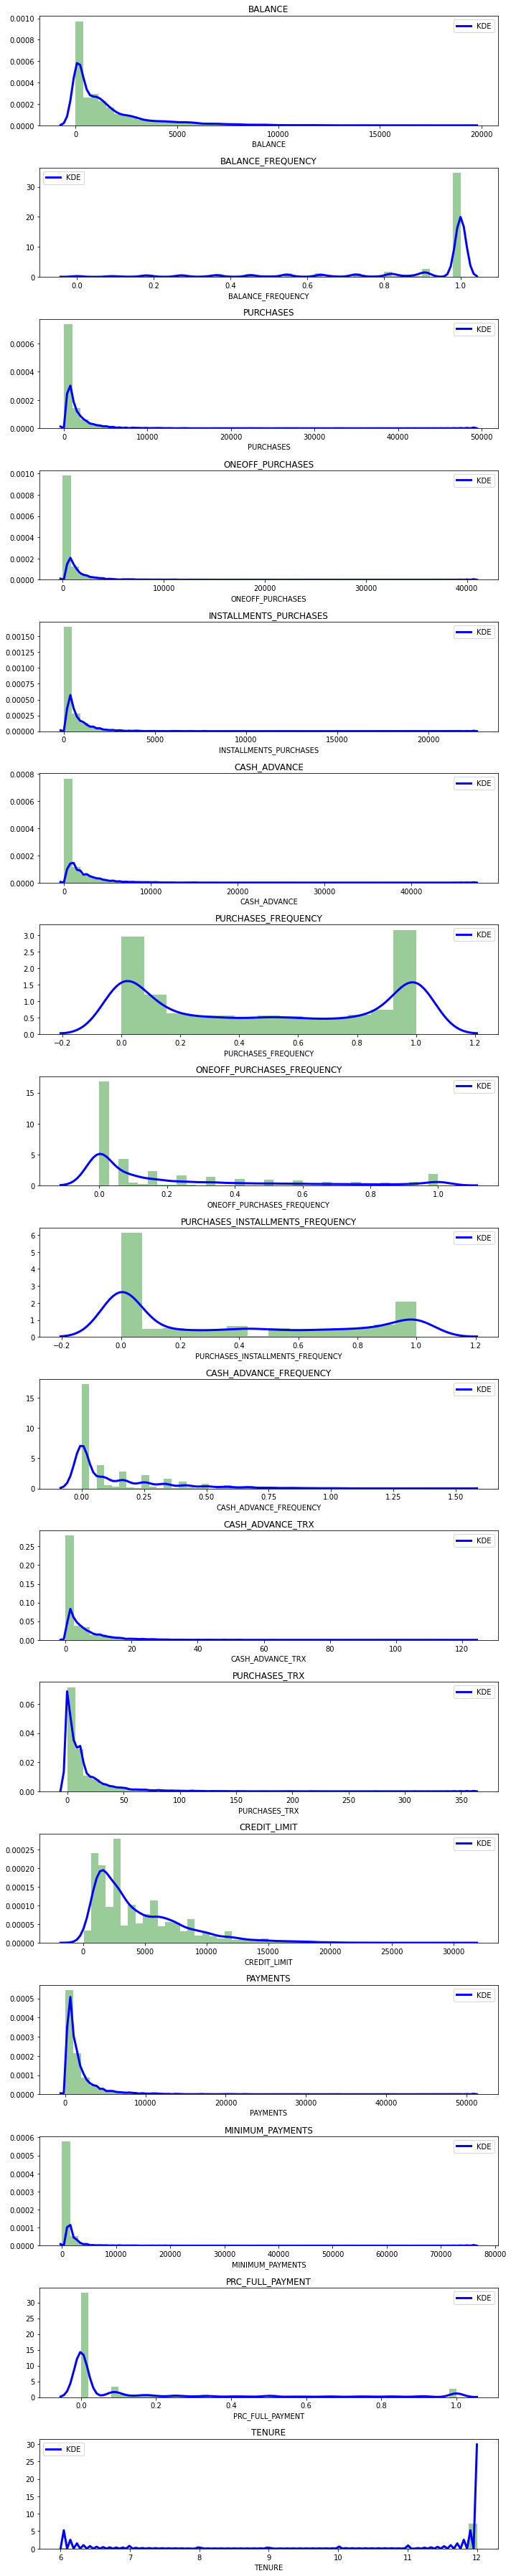

In [ ]:
# use seaborn kdeplot() to visualize the Probability Density of the variable. 

plt.figure(figsize=(10,50))
for i in range(df.shape[1]):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df.columns[i])

plt.tight_layout()

In [ ]:
# Get the correlation matrix between each feature
correlations = df.corr()

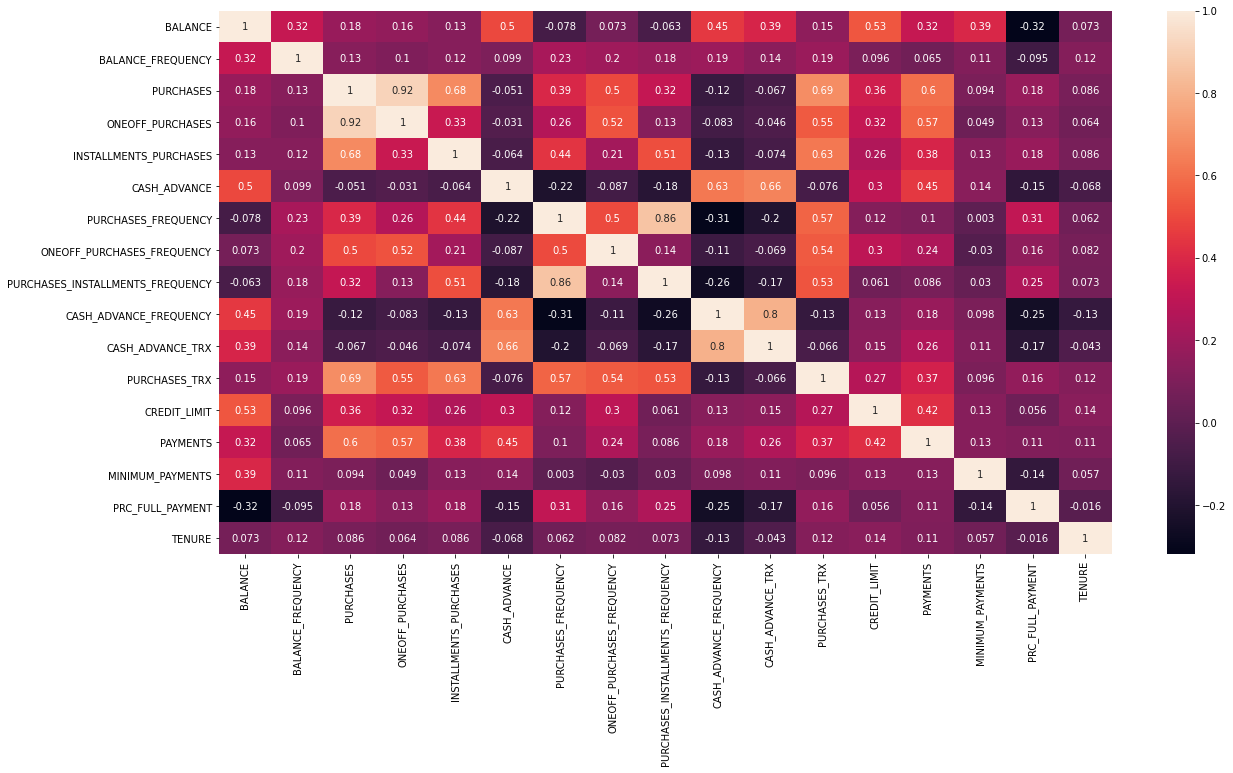

In [ ]:
#visulize the correlation matrix using seaborn heatmap()
f, ax = plt.subplots(figsize = (20,10))
sns.heatmap(correlations, annot=True)

## Understand K-means and learn how to obtain the optimal number of culsters(ELBOW METHOD)

**The way kmeans algorithm works is as follows:**

1. Specify number of clusters K.
2. Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
3. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
 * Compute the sum of the squared distance between data points and all centroids.
 * Assign each data point to the closest cluster (centroid).
 * Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

**Use ELBOW METHOD to choose the optimal number of clusters**

*Elbow method* gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow. We’ll use the geyser dataset and evaluate SSE for different values of k and see where the curve might form an elbow and flatten out.

[More information about K-Means and ELBOW METHOD](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a#:~:text=Kmeans%20algorithm%20is%20an%20iterative,belongs%20to%20only%20one%20group.&text=Keep%20iterating%20until%20there%20is,to%20clusters%20isn't%20changing.)

##Use ELBOW METHOD to Find the Optimal Number of Culsters

In [41]:
# Scale the data
#StandardScaler transform the data such that its distribution will have a mean 
#value 0 and standard deviation of 1
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [16]:
df_scaled.shape

(8950, 17)

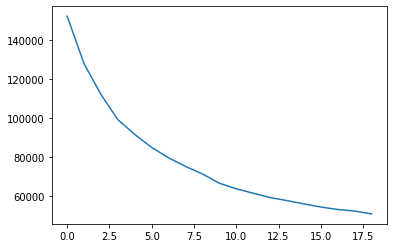

In [ ]:
scores = []

for i in range(1,20):
  k_means = KMeans(n_clusters=i) #Create a KMeans object with cluster i = 1,2,3...,20
  k_means.fit(df_scaled) #Compute k-means clustering
  scores.append(k_means.inertia_) #Attribute inertia_ atgives the sum of squared 
                                  #distances of samples to their closest cluster center
plt.plot(scores)

* From the graph above, 4th or 5th cluster seems to to be forming the elbow of the curve

[More info about sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

##APPLY K-MEANS METHOD

In [42]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df_scaled)
labels = kmeans.labels_ # attribute labels_ gives a ndarray of shape (n_samples,), the labels of each point

In [43]:
set(labels)

{0, 1, 2, 3, 4}

* We have 5 clusters here, and they are assigned to the labels 0,1,2,...,5

In [44]:
kmeans.cluster_centers_.shape

(5, 17)

* The attribute cluster_centers_ gives the centers of each cluster. Since we have 17 features and 5 clusters, each row of the 'cluster_centers_' is the corrdinate of a cluster.

In [45]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.241133,-0.334171,-0.339466,-0.221195,-0.396152,-0.168225,-0.815770,-0.354246,-0.752315,-0.074601,-0.146383,-0.473362,-0.314238,-0.251169,-0.112263,-0.286666,-0.045232
1,1.482803,0.382613,-0.235448,-0.172561,-0.239783,1.764611,-0.513434,-0.235322,-0.452469,1.787799,1.684233,-0.291165,0.852404,0.658747,0.497601,-0.401464,-0.108165
2,-0.442608,0.103282,-0.097393,-0.256306,0.240550,-0.381964,0.910428,-0.398741,1.079070,-0.485454,-0.372215,0.077256,-0.355784,-0.276346,-0.080579,0.405725,-0.046176
3,1.443484,0.415902,7.043767,6.181111,5.296366,0.029765,1.084224,1.874158,1.042173,-0.253894,-0.050586,4.698379,2.166844,4.825204,1.092576,0.814424,0.333671
4,0.160911,0.431546,0.903523,0.845334,0.583269,-0.296881,1.081474,1.780462,0.560091,-0.384067,-0.305534,1.164884,0.687647,0.368796,-0.011955,0.384678,0.277114


In [46]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1062.577152,0.798109,277.930432,225.299781,52.831891,626.095155,0.162943,0.096779,0.065448,0.120216,2.249873,2.943823,3351.122127,1006.034148,602.581712,0.069870,11.456787
1,4650.805063,0.967908,500.165912,306.021265,194.234619,4679.343305,0.284285,0.132256,0.184615,0.492901,14.742478,7.472566,7595.844730,3640.150792,2023.845449,0.036293,11.372566
2,643.224253,0.901737,795.122664,167.022052,628.594315,177.875480,0.855749,0.083506,0.793287,0.038000,0.708730,16.630120,3199.961238,933.149554,676.419947,0.272382,11.455523
3,4568.965194,0.975794,16052.320602,10851.814819,5200.505783,1041.289988,0.925502,0.761555,0.778624,0.084337,2.903614,131.493976,12378.313253,15701.636847,3410.408242,0.391920,11.963855
4,1899.397070,0.979500,2933.595505,1995.518160,938.510245,356.297315,0.924398,0.733604,0.587032,0.058288,1.163781,43.664502,6996.390529,2800.772305,836.346210,0.266226,11.888167


 ### Base on the the cluster centers,we have: 
 
 * 0 -> Transactors: the customers who pay least amount of intrerest charges and careful with their money,  Cluster with very low balance, cash advance and Percentage of full payment.
 * 1 -> revolvers: the customers who use credit card as a loan. This group is most lucrative sector for the bank since they pay 20% interest. High balance, cash advance, cash advance frequency and cash advance transactions, but low purchase frequency and percentage of full payment.
 * 3 -> VIP/Prime: the customers with highest credit limit/% of full payment and percentage of full payment; targeted to increase their credit limit/spending. 
 * 2 -> New customers: the customers with low tenure and low balance who can be targeted to enroll in other bank services(ex: travel credit card)

In [47]:
#Predition
y_kmeans = kmeans.fit_predict(df_scaled) 
y_kmeans

array([1, 3, 4, ..., 0, 1, 1], dtype=int32)

In [48]:
# concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


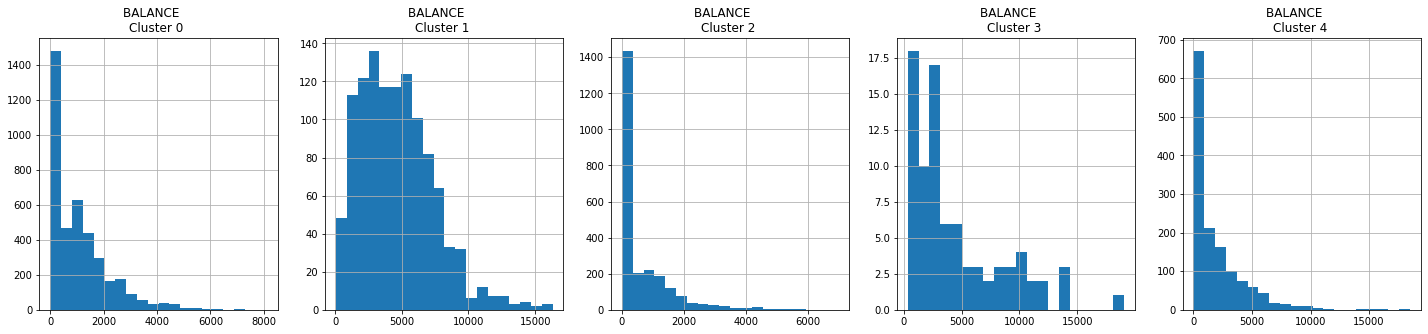

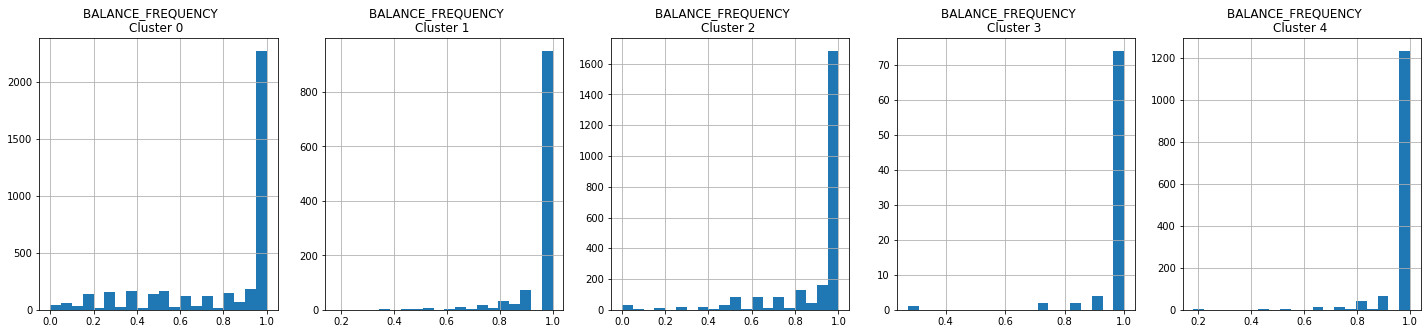

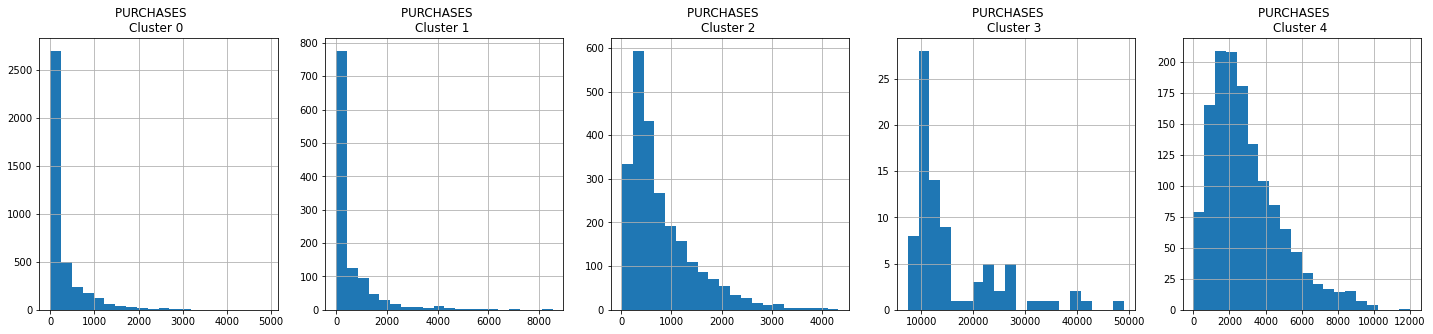

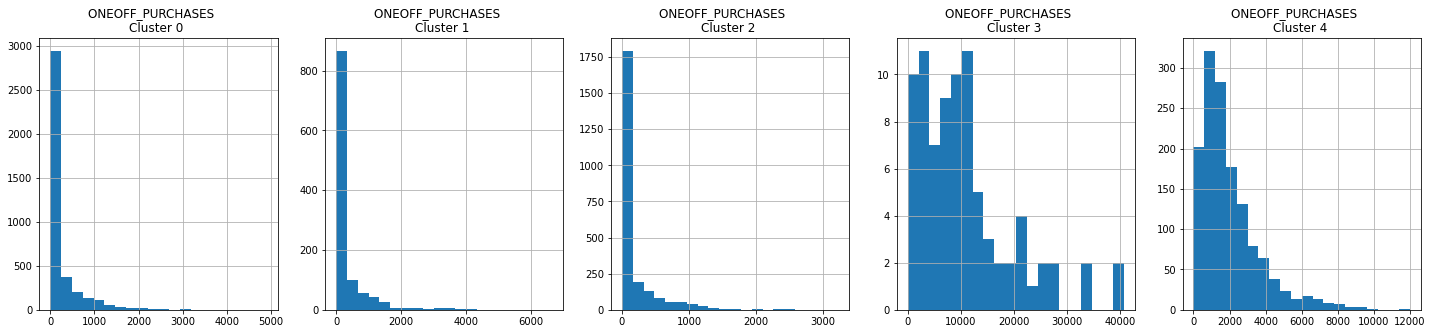

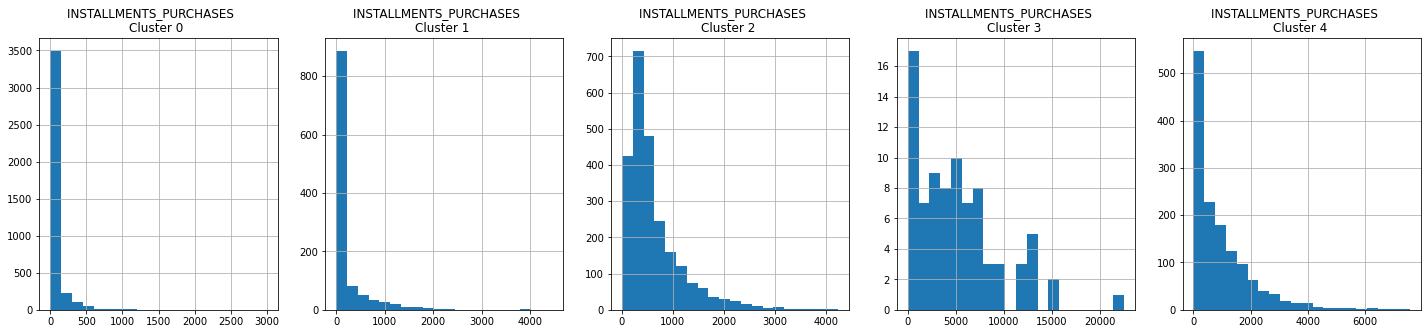

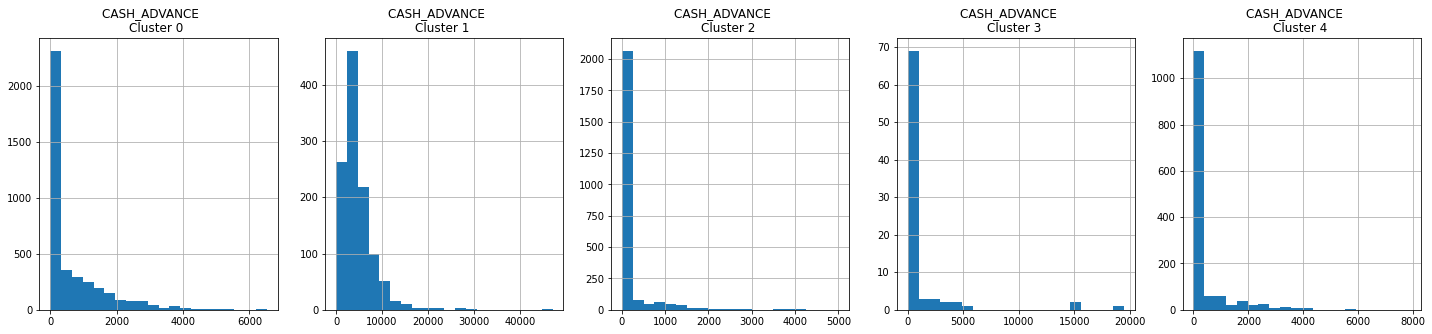

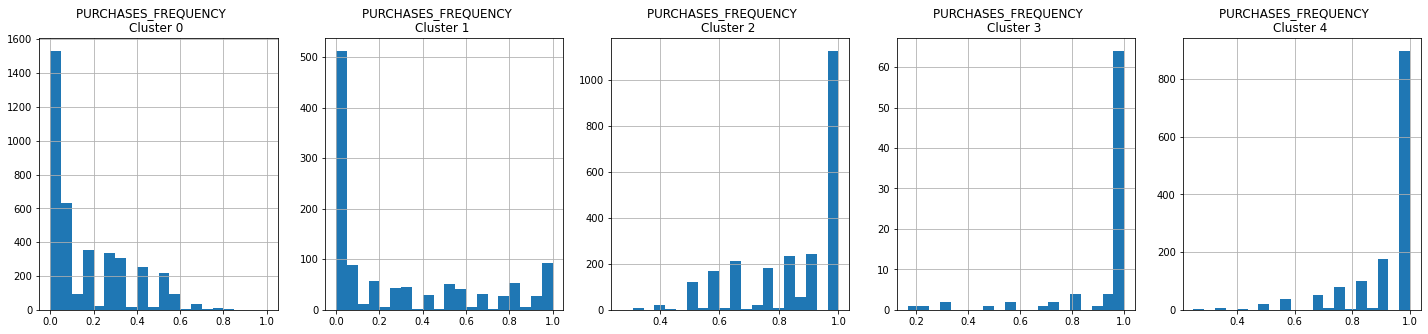

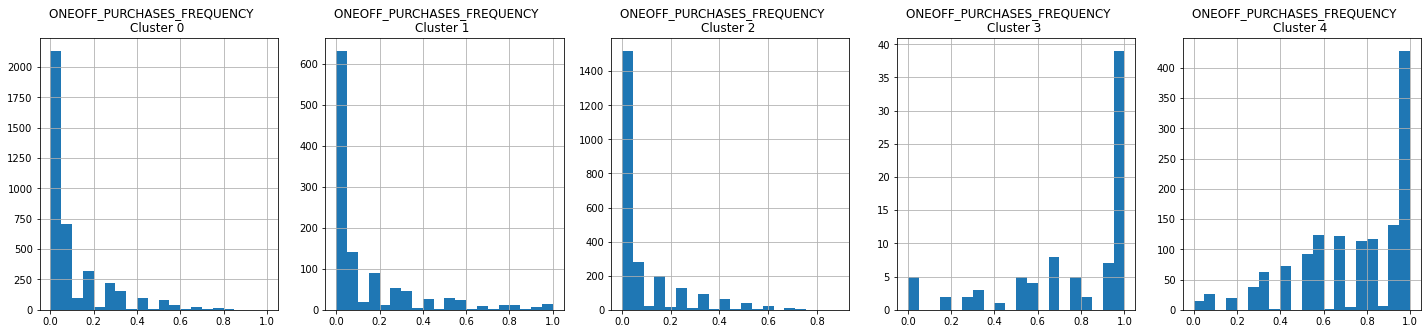

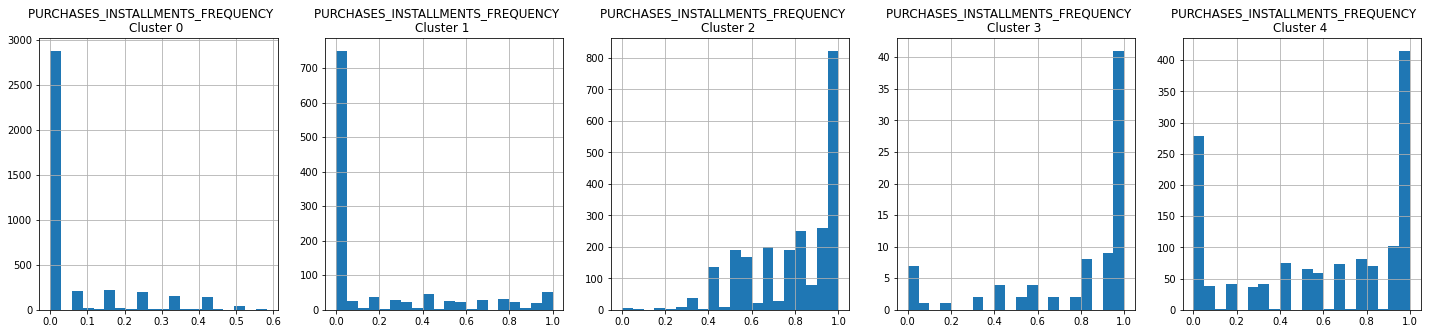

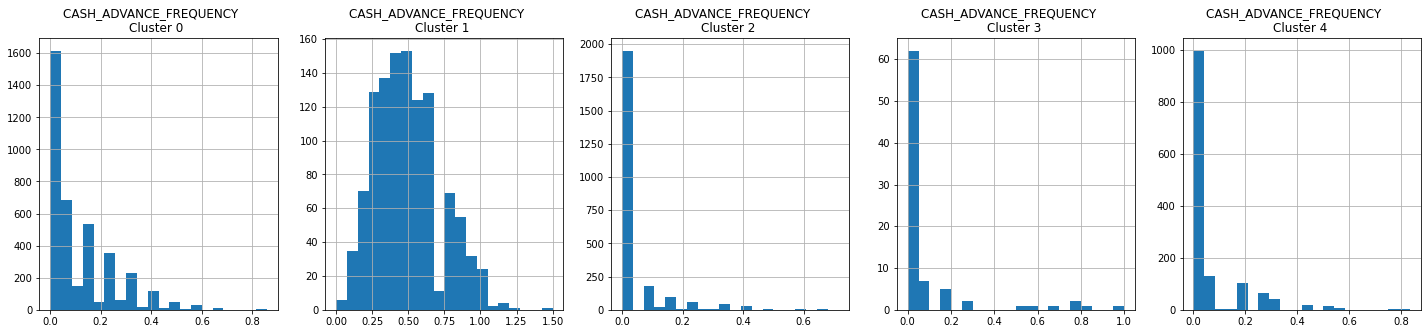

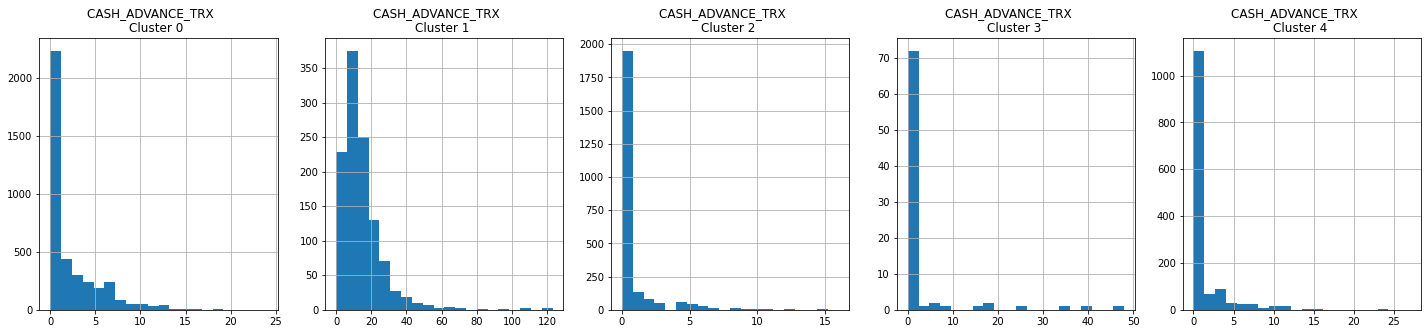

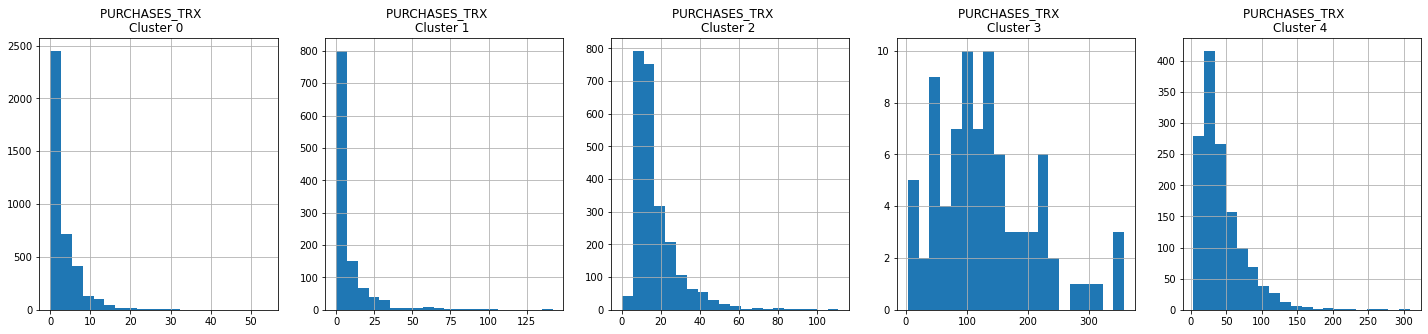

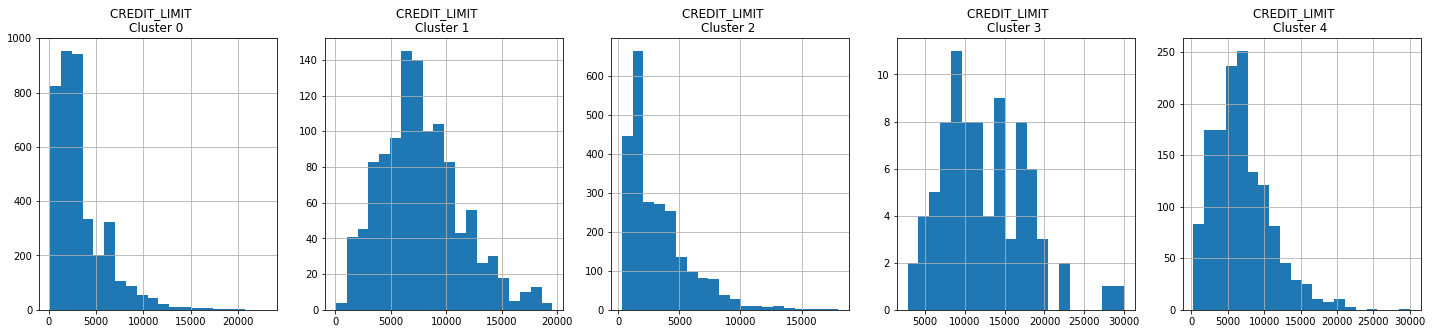

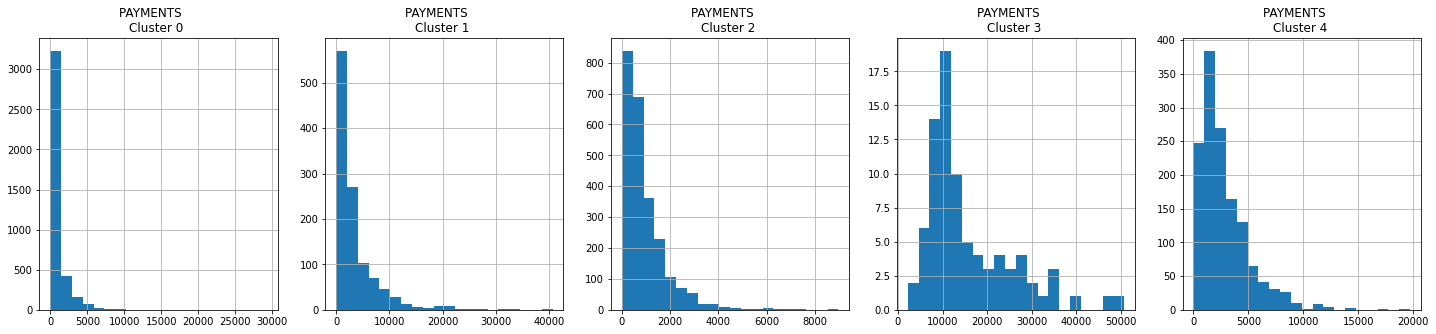

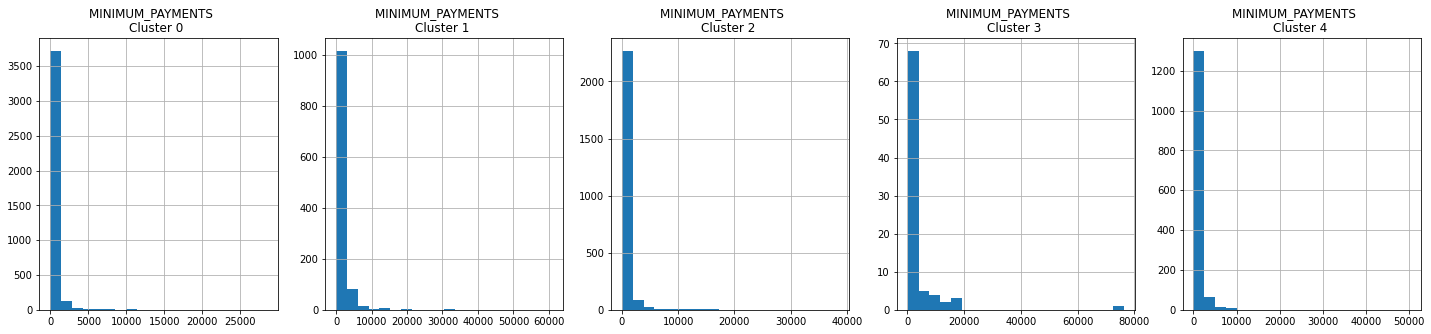

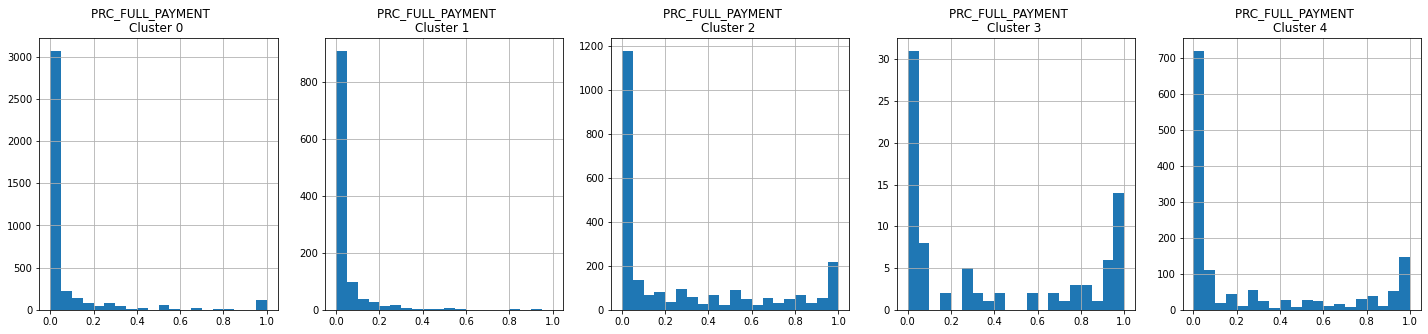

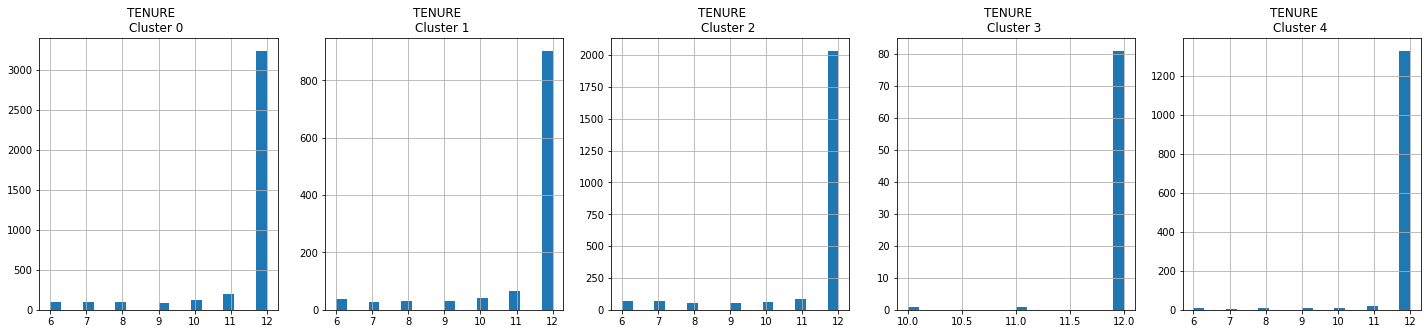

In [49]:
# Plot the histogram of various clusters
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(5):
    plt.subplot(1,7,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()


##Understand Principal Component Analysis(PCA) 

**Principal Component Analysis**, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

[A STEP BY STEP EXPLANATION OF PRINCIPAL COMPONENT ANALYSIS](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)

##Apply Principal Component Analysis(PCA) AND Visualize the Results

In [50]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222012, -1.07645424],
       [-1.13829198,  2.50646563],
       [ 0.96968476, -0.38351125],
       ...,
       [-0.92620509, -1.81078433],
       [-2.33655338, -0.65796507],
       [-0.55642232, -0.40045846]])

In [65]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076454
1,-1.138292,2.506466
2,0.969685,-0.383511
3,-0.873626,0.043150
4,-1.599434,-0.688578


In [66]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076454,0
1,-1.138292,2.506466,1
2,0.969685,-0.383511,4
3,-0.873626,0.043150,0
4,-1.599434,-0.688578,0


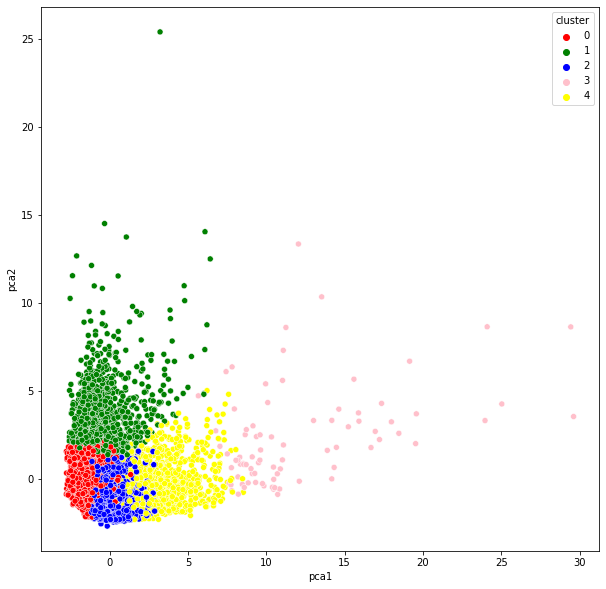

In [67]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow'])
plt.show()